# Random Sample Imputation

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("C:/Users/korla/Desktop/krish codes/Feature Engineering/Feature-Engineering-Live-sessions-master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
# considering Age feature

In [75]:
df.Age.isnull().sum()

177

In [76]:
# Average of the null value
df.Age.isnull().mean()

0.19865319865319866

In [77]:
# Now should replace with the random selected values using single method

In [78]:
df.Age.isnull().sum()

177

In [79]:
# the below line shows the in the given feature (Age) after removing the null values it will select the random value from the remaining Age feature

# the random value will be get changed time to time to reduce this proble we apply random state 
df.Age.dropna().sample()

151    22.0
Name: Age, dtype: float64

In [80]:
# the random value wont change time time
df.Age.dropna().sample(random_state=0)

423    28.0
Name: Age, dtype: float64

In [81]:
# Now we will apply  random values to all the null values in the (Age) fetaures


In [82]:
random_value = df.Age.dropna().sample(df.Age.isnull().sum(),random_state=0)
random_value

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [83]:
# now we will asign these random to the Age features where there is null values

In [84]:
def fun(df,var):
    df[var+"_replaced"]=df[var]
    ##It will have the random sample to fill the na
    random_value=df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_value.index=df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_replaced']=random_value

In [85]:
fun(df,"Age")

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_replaced
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [87]:
# At the end of the columns there was a column age_replaced in which null values are replaced with random distributed values

In [88]:
# now lets check the average of the null values in the age and age replaced columns

In [89]:
df.Age.isnull().mean()

0.19865319865319866

In [90]:
df.Age_replaced.isnull().sum()

0

In [91]:
# check there is no null values

In [92]:
df.Age.isnull().sum()

177

In [93]:
df.Age_replaced.isnull().sum()

0

In [94]:
# lets check the standard deviation of Age and Age_replaced

In [95]:
df.Age.std()

14.526497332334044

In [96]:
df.Age_replaced.std()

14.5636540895687

In [97]:
# perfect there are on the same range 

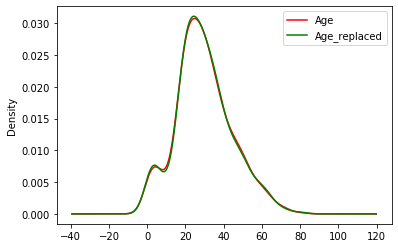

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color="red")
df.Age_replaced.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [101]:
# check both are on the same range ..pretty simple ...

In [102]:
# now lets check it with median replaced values also

In [104]:
median = df.Age.median()
median

28.0

In [109]:
def fun(df,var,median):
    df[var+"_median"]=df[var].fillna(median)
    df[var+"_replaced"]=df[var]
    ##It will have the random sample to fill the na
    random_value=df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_value.index=df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_replaced']=random_value

In [110]:
fun(df,'Age',median)

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_replaced,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


In [112]:
df.Age.mean()

29.69911764705882

In [113]:
df.Age_replaced.mean()

29.700347923681257

In [114]:
df.Age_median.mean()

29.36158249158249

In [115]:
df.Age.std()

14.526497332334044

In [116]:
df.Age_replaced.std()

14.5636540895687

In [117]:
df.Age_median.std()

13.019696550973194

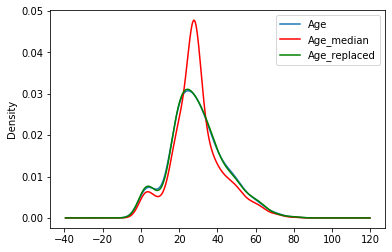

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_replaced.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [119]:
# Age median shows some deviation when compared Random distribution technique 